<a href="https://colab.research.google.com/github/GabrielFerla7/CheckPoint-2-/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nome: Gabriel Ferla Martins dos Anjos
##RM: 93344

## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [24]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

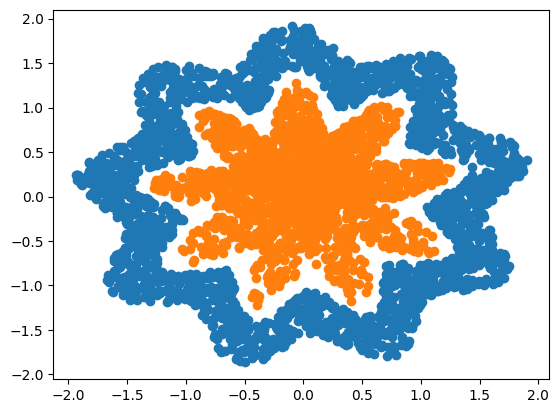

In [25]:
## coloque seu RM aqui!!
RM = [9,3,3,4,4]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

##Começo do Projeto!!

In [26]:
import pandas as pd

df_c1 = pd.DataFrame(c1, columns=['X','Y'])
df_c2 = pd.DataFrame(c2, columns=['X','Y'])

df_c1['cor'] = 0 #Laranja
df_c2['cor'] = 1 #Azul

df = pd.concat([df_c1, df_c2])


####Vendo a Quantidade de Dados




In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 2299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       4600 non-null   float64
 1   Y       4600 non-null   float64
 2   cor     4600 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 143.8 KB


In [28]:
df

,X,Y,cor
0,0.958681,0.577977,0
1,-0.520652,1.233734,0
2,1.401033,-0.234821,0
3,-1.137815,1.174624,0
4,-1.585858,0.553105,0
...,...,...,...
2295,-0.414925,0.111519,1
2296,0.182220,0.038635,1
2297,0.260079,0.624186,1
2298,0.442547,0.564675,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(columns = ['cor'])
y = df['cor']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=130)

#Tensor Flow Keras

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=6, input_shape=(2,), activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 18        
                                                                 
 batch_normalization_3 (Batc  (None, 6)                24        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 121
Non-trainable params: 12
_______________________________________________________

##Usando o Adam

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Testei o Sgd porém obtive um resultado mais satisfatorio usando o Adam obtendo uma acuracia mais eficaz e mais consistente 

##Modelo Treinado

In [38]:
history = model.fit(x_train, y_train, epochs=75, batch_size = 12, validation_split=0.3)

Epoch 1/75
188/188 [==============================] - 3s 6ms/step - loss: 0.6649 - accuracy: 0.5936 - val_loss: 0.6586 - val_accuracy: 0.7495
Epoch 2/75
188/188 [==============================] - 1s 7ms/step - loss: 0.6194 - accuracy: 0.7493 - val_loss: 0.5820 - val_accuracy: 0.8333
Epoch 3/75
188/188 [==============================] - 2s 8ms/step - loss: 0.4979 - accuracy: 0.8270 - val_loss: 0.3782 - val_accuracy: 0.8778
Epoch 4/75
188/188 [==============================] - 1s 5ms/step - loss: 0.3465 - accuracy: 0.8807 - val_loss: 0.2782 - val_accuracy: 0.9161
Epoch 5/75
188/188 [==============================] - 1s 5ms/step - loss: 0.2519 - accuracy: 0.9148 - val_loss: 0.1662 - val_accuracy: 0.9389
Epoch 6/75
188/188 [==============================] - 1s 5ms/step - loss: 0.2362 - accuracy: 0.9117 - val_loss: 0.1444 - val_accuracy: 0.9462
Epoch 7/75
188/188 [==============================] - 1s 6ms/step - loss: 0.2095 - accuracy: 0.9228 - val_loss: 0.1361 - val_accuracy: 0.9462
Epoch 

####Análise do Modelo

Como podemos analisar o modelo obteve um otimo resultado e o val_accuracy esta bem proximo da accuracy significa que o modelo não esta viciado e que ele esta realmente obtendo o resultado esperado

###Gráficos!!

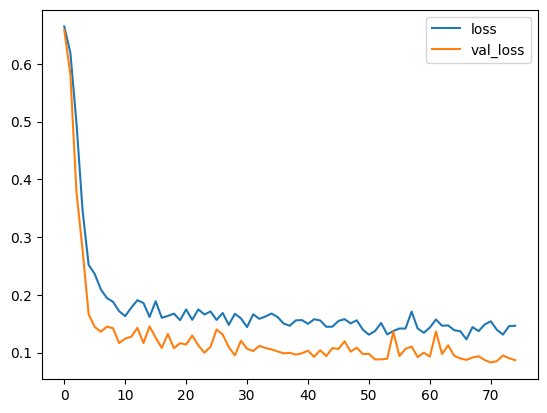

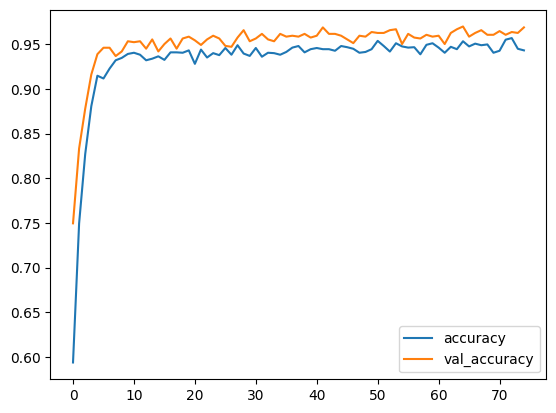

In [39]:
history_df = pd.DataFrame(history.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();

#Conclusão!!!!

Ao final desse estudo podemos ver que as Redes tem que ser varias vezes testadas porque qualquer camada de ativação ou de otimização pode mudar o resultado da sua rede, eu optei por usar o Tensor Flow pois testei os demais e o TF foi o que obteve o resultado mais satisfatorio e consistente dentro dos modelos testados.